# Gradient Descent and Backpropogation

### To complete this assignment, create a Jupyter notebook containing your solutions to the following tasks:

1. In this task, you'll implement several ANN models with different batch sizes. Specifically:
  1. Implement a three layer ANN model with 128, 64 and 10 neurons in the layers using 8 as the mini batch size.
  1. Implement a three layer ANN model with 128, 64 and 10 neurons in the layers using 128 as the mini batch size.
  1. Implement a three layer ANN model with 128, 64 and 10 neurons in the layers using the full sample as the batch.
  1. Compare the result of each model with each other. Which batch size did perform better?
1. In this task, you'll implement several ANN models with different learning rates for the stochastic gradient descent. In all of the models below, use 128 as your mini batch size.
  1. Implement a three layer ANN model with 128, 64 and 10 neurons in the layers using 0.01 as the learning rate.
  1. Implement a three layer ANN model with 128, 64 and 10 neurons in the layers using 100 as the learning rate.
  1. Implement a three layer ANN model with 128, 64 and 10 neurons in the layers using 0.0000001 as the learning rate.
  1. Compare the result of each model with each other. Which learning rate did perform better?

### Lib imports and data load

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

input_dim = 784  # 28*28
output_dim = nb_classes = 10
batch_size = 128

X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

### Model Set 1 - Variable Batch Size

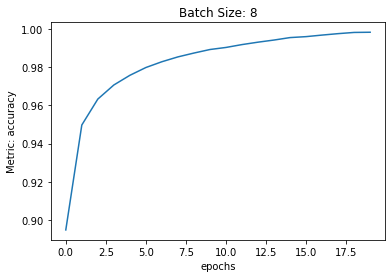

,train-score,test-score
loss-function: categorical_crossentropy,0.006815,0.075189
metrics: accuracy,0.999150,0.980300


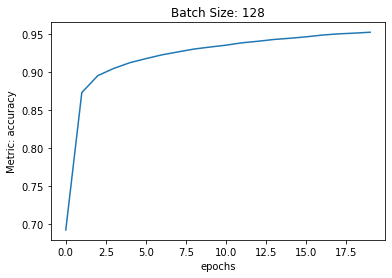

,train-score,test-score
loss-function: categorical_crossentropy,0.163136,0.165667
metrics: accuracy,0.954083,0.951800


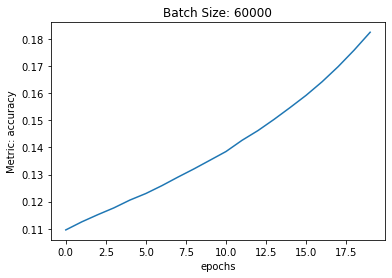

,train-score,test-score
loss-function: categorical_crossentropy,2.188408,2.181734
metrics: accuracy,0.189567,0.198400


In [18]:
for bs in [8, 128, X_train.shape[0]]:
    model = Sequential()
    model.add(Dense(128, input_shape=(input_dim,), activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(output_dim, activation='softmax'))

    mtrcs = ['accuracy']
    loss_fn = 'categorical_crossentropy'
    model.compile(optimizer='sgd', loss=loss_fn, metrics=mtrcs)
    history = model.fit(X_train, Y_train, batch_size=bs, epochs=20, verbose=0)

    train_score = model.evaluate(X_train, Y_train, verbose=0)
    test_score = model.evaluate(X_test, Y_test, verbose=0)

    scoredf = pd.DataFrame(index=[f"loss-function: {loss_fn}"] + ["metrics: " + i for i in mtrcs], 
                           columns=['train-score', 'test-score'])
    scoredf['train-score'] = train_score
    scoredf['test-score'] = test_score
    plt.plot(history.history[mtrcs[0]])
    plt.title(f"Batch Size: {bs}")
    plt.ylabel(f"Metric: {mtrcs[0]}")
    plt.xlabel("epochs")
    plt.show()
    display(scoredf)

<span style="color:blue">the smallest batch size performed the best as expected, but with a batch size of 128 we still have a performance that is sufficiently good with both train and test accuracy with significantly faster building time.</span>

### Model Set 2 - Variable Learning Rate

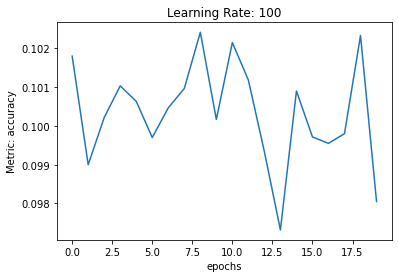

,train-score,test-score
loss-function: categorical_crossentropy,42.653021,42.593604
metrics: accuracy,0.099300,0.103200


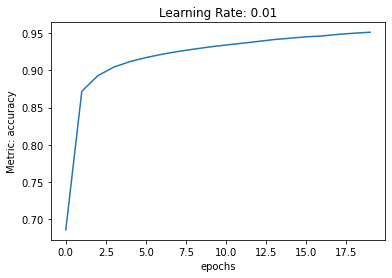

,train-score,test-score
loss-function: categorical_crossentropy,0.16600,0.171969
metrics: accuracy,0.95295,0.949100


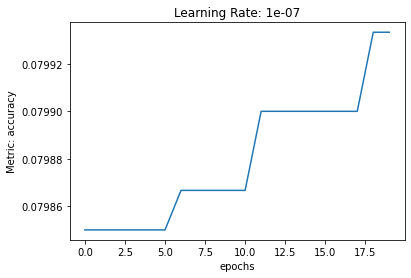

,train-score,test-score
loss-function: categorical_crossentropy,2.345642,2.342348
metrics: accuracy,0.079933,0.084200


In [19]:
for lr in [100, 0.01, 0.0000001]:
    model = Sequential()
    model.add(Dense(128, input_shape=(input_dim,), activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(output_dim, activation='softmax'))

    mtrcs = ['accuracy']
    loss_fn = 'categorical_crossentropy'
    sgd = SGD(learning_rate=lr)
    model.compile(optimizer=sgd, loss=loss_fn, metrics=mtrcs)
    history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=0)

    train_score = model.evaluate(X_train, Y_train, verbose=0)
    test_score = model.evaluate(X_test, Y_test, verbose=0)

    scoredf = pd.DataFrame(index=[f"loss-function: {loss_fn}"] + ["metrics: " + i for i in mtrcs], 
                           columns=['train-score', 'test-score'])
    scoredf['train-score'] = train_score
    scoredf['test-score'] = test_score
    plt.plot(history.history[mtrcs[0]])
    plt.title(f"Learning Rate: {lr}")
    plt.ylabel(f"Metric: {mtrcs[0]}")
    plt.xlabel("epochs")
    plt.show()
    display(scoredf)

<span style="color:blue">the lowest and highest learning rate perform the worst since they're never able to converge.</span>